# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images


Done extracting features for 3000 / 49000 images


Done extracting features for 4000 / 49000 images


Done extracting features for 5000 / 49000 images


Done extracting features for 6000 / 49000 images


Done extracting features for 7000 / 49000 images


Done extracting features for 8000 / 49000 images


Done extracting features for 9000 / 49000 images


Done extracting features for 10000 / 49000 images


Done extracting features for 11000 / 49000 images


Done extracting features for 12000 / 49000 images


Done extracting features for 13000 / 49000 images


Done extracting features for 14000 / 49000 images


Done extracting features for 15000 / 49000 images


Done extracting features for 16000 / 49000 images


Done extracting features for 17000 / 49000 images


Done extracting features for 18000 / 49000 images


Done extracting features for 19000 / 49000 images


Done extracting features for 20000 / 49000 images


Done extracting features for 21000 / 49000 images


Done extracting features for 22000 / 49000 images


Done extracting features for 23000 / 49000 images


Done extracting features for 24000 / 49000 images


Done extracting features for 25000 / 49000 images


Done extracting features for 26000 / 49000 images


Done extracting features for 27000 / 49000 images


Done extracting features for 28000 / 49000 images


Done extracting features for 29000 / 49000 images


Done extracting features for 30000 / 49000 images


Done extracting features for 31000 / 49000 images


Done extracting features for 32000 / 49000 images


Done extracting features for 33000 / 49000 images


Done extracting features for 34000 / 49000 images


Done extracting features for 35000 / 49000 images


Done extracting features for 36000 / 49000 images


Done extracting features for 37000 / 49000 images


Done extracting features for 38000 / 49000 images


Done extracting features for 39000 / 49000 images


Done extracting features for 40000 / 49000 images


Done extracting features for 41000 / 49000 images


Done extracting features for 42000 / 49000 images


Done extracting features for 43000 / 49000 images


Done extracting features for 44000 / 49000 images


Done extracting features for 45000 / 49000 images


Done extracting features for 46000 / 49000 images


Done extracting features for 47000 / 49000 images


Done extracting features for 48000 / 49000 images

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for reg in regularization_strengths:
        svm_tmp = LinearSVM()
        stats = svm_tmp.train(X=X_train_feats, y=y_train, 
                              learning_rate=lr, reg=reg, num_iters=500, verbose=True)
        train_acc = np.mean(svm_tmp.predict(X_train_feats) == y_train)
        val_acc = np.mean(svm_tmp.predict(X_val_feats) == y_val)
        results[(lr, reg)] = [train_acc, val_acc]
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm_tmp
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 500: loss 86.527182
iteration 100 / 500: loss 84.991551


iteration 200 / 500: loss 83.481031


iteration 300 / 500: loss 82.016079


iteration 400 / 500: loss 80.556683


iteration 0 / 500: loss 765.289390


iteration 100 / 500: loss 628.142186


iteration 200 / 500: loss 515.856275


iteration 300 / 500: loss 423.940301


iteration 400 / 500: loss 348.690697


iteration 0 / 500: loss 7882.297878


iteration 100 / 500: loss 1063.863134


iteration 200 / 500: loss 150.328871


iteration 300 / 500: loss 27.936220


iteration 400 / 500: loss 11.536722


iteration 0 / 500: loss 84.402267


iteration 100 / 500: loss 70.748269


iteration 200 / 500: loss 59.550981


iteration 300 / 500: loss 50.367423


iteration 400 / 500: loss 42.880881


iteration 0 / 500: loss 809.872356


iteration 100 / 500: loss 116.305408


iteration 200 / 500: loss 23.377721


iteration 300 / 500: loss 10.926416


iteration 400 / 500: loss 9.258180


iteration 0 / 500: loss 7807.886438


iteration 100 / 500: loss 9.000001


iteration 200 / 500: loss 8.999997


iteration 300 / 500: loss 8.999997


iteration 400 / 500: loss 8.999996


iteration 0 / 500: loss 84.142242


iteration 100 / 500: loss 19.064490


iteration 200 / 500: loss 10.349179


iteration 300 / 500: loss 9.180060


iteration 400 / 500: loss 9.024042


iteration 0 / 500: loss 745.217269


iteration 100 / 500: loss 8.999969


iteration 200 / 500: loss 8.999969


iteration 300 / 500: loss 8.999973


iteration 400 / 500: loss 8.999972


iteration 0 / 500: loss 7919.735512


iteration 100 / 500: loss 9.000001


iteration 200 / 500: loss 9.000000


iteration 300 / 500: loss 9.000000


iteration 400 / 500: loss 8.999999


lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.117918 val accuracy: 0.125000


lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.087184 val accuracy: 0.107000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.089592 val accuracy: 0.094000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.090143 val accuracy: 0.111000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.101265 val accuracy: 0.103000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.410857 val accuracy: 0.411000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.245286 val accuracy: 0.238000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.405327 val accuracy: 0.408000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.327041 val accuracy: 0.308000
best validation accuracy achieved during cross-validation: 0.411000


In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.401


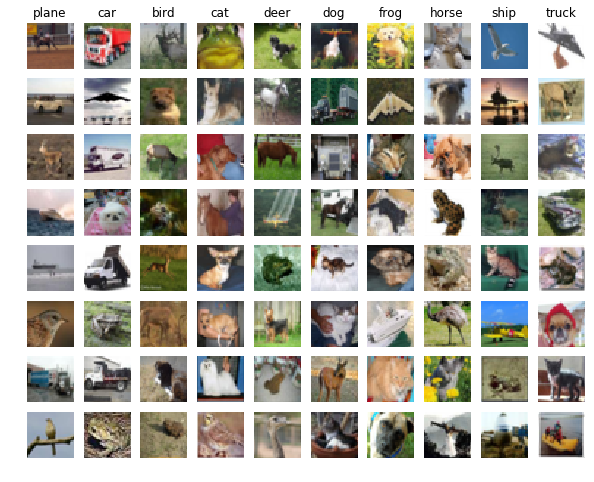

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
print(X_train_feats.shape)

(49000, 155)


In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet
import random

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
best_val = -1
results = {}
best_stats = None
learning_rates = [1.5]
regularization_strengths = []
# learning_rates = [1.8, 1.7, 1.6, 1.5]
# regularization_strengths = [0.01, 0.011]

# learning_rates = [1e-9, 1e-8, 1e-7]
# regularization_strengths = [5e1, 5e2, 5e3]

# for i in range(1):
#     learning_rates.append(10 ** random.uniform(-4, 1))
for i in range(10):
    regularization_strengths.append(10 ** random.uniform(-4, -3))

print(len(learning_rates), len(regularization_strengths))
for lr in learning_rates:
    for reg in regularization_strengths:
        net_tmp = TwoLayerNet(input_dim, hidden_dim, num_classes)
        stats = net_tmp.train(X=X_train_feats, y=y_train, X_val=X_val_feats, y_val=y_val,
                              learning_rate=lr, reg=reg, batch_size=500, num_iters=500, verbose=True)
        train_acc = np.mean(net_tmp.predict(X_train_feats) == y_train)
        val_acc = np.mean(net_tmp.predict(X_val_feats) == y_val)
        results[(lr, reg)] = [train_acc, val_acc]
        if val_acc > best_val:
            best_val = val_acc
            best_net = net_tmp
            best_stats = stats
print('THe best validation accuracy is: ', best_val)
for lr, reg in results:
    print('lr = ', lr, 'reg = ', reg, 'train acc = ',
          results[(lr, reg)][0], 'val acc = ', results[(lr, reg)][1])
################################################################################
#                              END OF YOUR CODE                                #
################################################################################


1 10
iteration 0 / 500: loss 2.302586
iteration 100 / 500: loss 1.462513


iteration 200 / 500: loss 1.277743


iteration 300 / 500: loss 1.177755


iteration 400 / 500: loss 1.143636


iteration 0 / 500: loss 2.302586


iteration 100 / 500: loss 1.390836


iteration 200 / 500: loss 1.209757


iteration 300 / 500: loss 1.125982


iteration 400 / 500: loss 1.148273


iteration 0 / 500: loss 2.302585


iteration 100 / 500: loss 1.416287


iteration 200 / 500: loss 1.173822


iteration 300 / 500: loss 1.104524


iteration 400 / 500: loss 1.164754


iteration 0 / 500: loss 2.302586


iteration 100 / 500: loss 1.481962


iteration 200 / 500: loss 1.289936


iteration 300 / 500: loss 1.221406


iteration 400 / 500: loss 1.192003


iteration 0 / 500: loss 2.302586


iteration 100 / 500: loss 1.361672


iteration 200 / 500: loss 1.384713


iteration 300 / 500: loss 1.304999


iteration 400 / 500: loss 1.238134


iteration 0 / 500: loss 2.302586


iteration 100 / 500: loss 1.377624


iteration 200 / 500: loss 1.268139


iteration 300 / 500: loss 1.148456


iteration 400 / 500: loss 1.111251


iteration 0 / 500: loss 2.302585


iteration 100 / 500: loss 1.428791


iteration 200 / 500: loss 1.237413


iteration 300 / 500: loss 1.200989


iteration 400 / 500: loss 1.235870


iteration 0 / 500: loss 2.302585


iteration 100 / 500: loss 1.279620


iteration 200 / 500: loss 1.187275


iteration 300 / 500: loss 1.253132


iteration 400 / 500: loss 1.074327


iteration 0 / 500: loss 2.302585


iteration 100 / 500: loss 1.331873


iteration 200 / 500: loss 1.224130


iteration 300 / 500: loss 1.147592


iteration 400 / 500: loss 1.056488


iteration 0 / 500: loss 2.302585


iteration 100 / 500: loss 1.359929


iteration 200 / 500: loss 1.275552


iteration 300 / 500: loss 1.148597


iteration 400 / 500: loss 1.055970


THe best validation accuracy is: 

 0.596
lr =  1.5 reg =  0.000716603795658 train acc =  0.629428571429 val acc =  0.554
lr =  1.5 reg =  0.000285014655677 train acc =  0.658612244898 val acc =  0.574
lr =  1.5 reg =  0.000769497894604 train acc =  0.650836734694 val acc =  0.576
lr =  1.5 reg =  0.00035116138908 train acc =  0.669857142857 val acc =  0.595
lr =  1.5 reg =  0.000180839432851 train acc =  0.671857142857 val acc =  0.578
lr =  1.5 reg =  0.000173218444288 train acc =  0.652775510204 val acc =  0.556
lr =  1.5 reg =  0.000297016210414 train acc =  0.653306122449 val acc =  0.572
lr =  1.5 reg =  0.000135851387078 train acc =  0.674489795918 val acc =  0.576
lr =  1.5 reg =  0.000402935897722 train acc =  0.662714285714 val acc =  0.596
lr =  1.5 reg =  0.000190650414221 train acc =  0.670306122449 val acc =  0.582


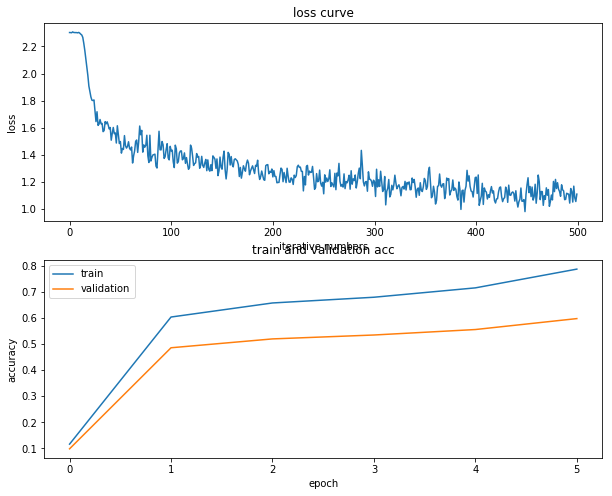

In [9]:
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.xlabel('iterative numbers')
plt.ylabel('loss')
plt.title('loss curve')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'])
plt.plot(best_stats['val_acc_history'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('train and validation acc')
plt.legend(['train', 'validation'])

In [10]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.567


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!